In [21]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1)
    def forward(self, x):
        x = self.fc1(x)
        return x

In [22]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)


In [23]:
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.1234]], requires_grad=True), Parameter containing:
tensor([-0.1526], requires_grad=True)]


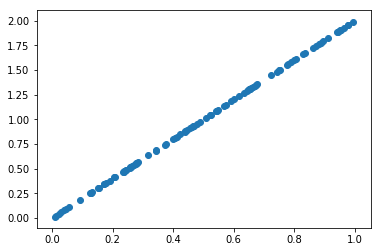

In [24]:
data2 = list(np.random.uniform(0, 1, 100))
for i in range(len(data2)):
    point = data2[i]
    dpoint = [point, 2*point]
    data2[i] = dpoint

data2 = np.array(data2)

def plot_data():
    xs_line = data2[:, 0]
    ys_line = data2[:, 1]

    plt.scatter(xs_line, ys_line)
    
plot_data()

In [25]:
import torch.optim as optim
def criterion(out, label):
    return (label - out)**2
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [26]:
for epoch in range(100):
    for i, point in enumerate(data2):
        X, Y = iter(point)
        X, Y = Variable(torch.FloatTensor([X]), requires_grad=True), Variable(torch.FloatTensor([Y]), requires_grad=False)
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if (i % 100 == 0):
            print("Epoch {} - loss: {}".format(epoch, loss.data[0]))

Epoch 0 - loss: 1.023322582244873
Epoch 1 - loss: 0.011469608172774315
Epoch 2 - loss: 0.00744981225579977
Epoch 3 - loss: 0.004421910271048546
Epoch 4 - loss: 0.0026234639808535576
Epoch 5 - loss: 0.0015564569039270282
Epoch 6 - loss: 0.0009234231547452509
Epoch 7 - loss: 0.0005478561506606638
Epoch 8 - loss: 0.0003250310255680233
Epoch 9 - loss: 0.0001928351994138211
Epoch 10 - loss: 0.00011440811067586765
Epoch 11 - loss: 6.7874752858188e-05
Epoch 12 - loss: 4.027004251838662e-05
Epoch 13 - loss: 2.389194196439348e-05
Epoch 14 - loss: 1.4174229363561608e-05
Epoch 15 - loss: 8.40933444123948e-06
Epoch 16 - loss: 4.989078206563136e-06
Epoch 17 - loss: 2.960079200420296e-06
Epoch 18 - loss: 1.7561287677381188e-06
Epoch 19 - loss: 1.042010467244836e-06
Epoch 20 - loss: 6.181809908412106e-07
Epoch 21 - loss: 3.6665880998043576e-07
Epoch 22 - loss: 2.1753487544629024e-07
Epoch 23 - loss: 1.2909418956041918e-07
Epoch 24 - loss: 7.655445699583652e-08
Epoch 25 - loss: 4.5431306716636755e-08


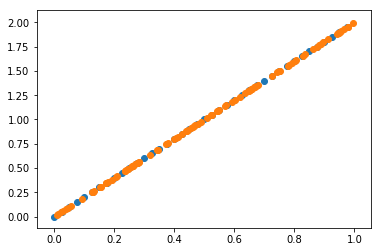

In [27]:
points = []
calculated = []
for i in range(40):
    points.append(i/40)
    calculated.append(net(torch.FloatTensor([i/40])).detach().numpy())

plt.scatter(points, calculated)

plot_data()